In [23]:
class EnkfInput:
    def __init__(self, x, P, z, dim_z, dim_x, dt, N, F):
        self.x = x
        self.P = P
        self.z = z
        self.dim_z = dim_z
        self.dim_x = dim_x
        self.dt = dt
        self.N = N
        self.F = F
        self.x_post = None
        self.P_post = None

In [32]:
from EnKF import enkf
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
n = 1
m = 1
A = np.eye(n,n)
H = np.eye(m, n)
Q = np.eye(n) 
R = np.eye(m)
np.random.seed(0)

# Initial state and covariance
x0 = np.zeros(n)
P0 = np.eye(n) 

# Synthetic measurements
n_steps = 100
x = np.zeros((n, n_steps))
y = np.zeros((m, n_steps))
x[:, 0] = x0
y[:, 0] = H @ x0 + np.random.multivariate_normal(np.zeros(m), R)
for t in range(1, n_steps):
    x[:, t] = A @ x[:, t-1] + np.random.multivariate_normal(np.zeros(n), Q)
    y[:, t] = H @ x[:, t] + np.random.multivariate_normal(np.zeros(m), R)

# System dynamics
def f(x, dt): 
    return A @ x

# Measurements
def h(x): 
    return H @ x

# Ensemble Kalman Filter
my_enkf = enkf() # Initialize your enkf class

# Set up the necessary parameters for your EnKF class
enkf_input = EnkfInput(
    x=x0,
    P=P0,
    z=None,
    dim_z=m,
    dim_x=n,
    dt=1.,
    N=10,
    F=np.eye(n),
)

# Simulation
state_estimates = np.zeros((n, n_steps))
covariance_matrices = np.zeros((n, n, n_steps))

# for t, yi in enumerate(y.T):
#     enkf_input.z = yi  # Update the measurements
#     my_enkf.run_enkf(enkf_input)
#     state_estimates[:, t] = enkf_input.x_post
#     covariance_matrices[:, :,  t] = enkf_input.P_post
#     enkf_input.x = enkf_input.x_post
#     enkf_input.P = enkf_input.P_post
#     print(t)

# # uncertaitny bounds
# standard_deviations = np.zeros((n, n_steps))
# for t in range(n_steps):
#     standard_deviations[:, t] = np.sqrt(np.diag(covariance_matrices[:, :, t]))

In [39]:
enkf_input.z = y[:, 0]  # Update the measurements
my_enkf.run_enkf(enkf_input)

In [45]:
enkf_input.x_post

NameError: name 'standard_deviations' is not defined

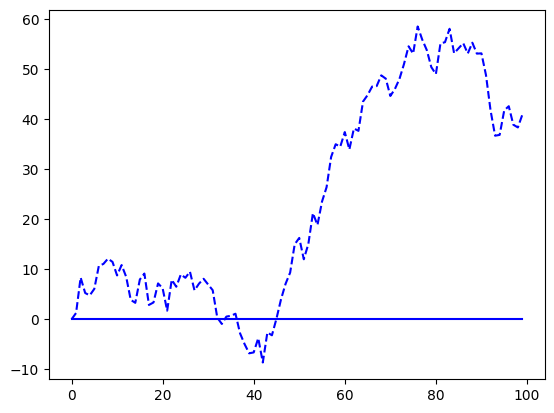

In [21]:
colors = ['blue', 'green', 'red']  # Add more colors if there are more states

# Create a new figure
plt.figure()

# Plot state estimates with uncertainty bounds
for i in range(n):
    plt.plot(x[i, :], color=colors[i], linestyle = '--' , label=f"True state {i}")
    plt.plot(state_estimates[i, :], color=colors[i], label=f"Estimated state {i}")
    plt.fill_between(
        np.arange(n_steps),
        state_estimates[i, :] - 1.96 * standard_deviations[i, :],
        state_estimates[i, :] + 1.96 * standard_deviations[i, :],
        color=colors[i], alpha=0.3  # Lighter color for uncertainty bounds
    )

plt.xlabel('Time step')
plt.ylabel('States')
plt.legend()
plt.show()